In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import os
from itertools import chain

import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# import transform_fns as trans
import pdm_functions as fns
import process_fns as pfns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import gaussian_kde

import pickle



In [13]:
# data_stacked = torch.load('dataset/train_datasets/train_data_stacked.pt', weights_only=True)

In [18]:
dev_stacked = torch.load('dataset/train_datasets/dev_data_stacked.pt', weights_only=True)
test_stacked = torch.load('dataset/train_datasets/test_data_stacked.pt', weights_only=True)
data_stacked_for_model_structure = torch.load('dataset/train_datasets/train_set_for_model_structure.pt', weights_only=True)

In [19]:
# dev_stacked

In [20]:
# data = pfns.to_stack('dataset/5528_droped_data.csv', 'cls') 

In [21]:
# X_train_model_run, y_train_model_run = data[0][0], data[0][1]
# X_test, y_test = data[1][0], data[1][1]
# X_dev, y_dev = data[2][0], data[2][1]
# X_train.shape, y_train.shape

In [22]:
# X_train = data_stacked['X_train_stacked']
# y_train = data_stacked['y_train_stacked']
# X_train.shape, y_train.shape

In [23]:
X_train_for_model = data_stacked_for_model_structure['X_train_for_model_structure']
y_train_for_model = data_stacked_for_model_structure['y_train_for_model_structure']
X_train_for_model.shape, y_train_for_model.shape

(torch.Size([5275, 1, 36, 2048]), torch.Size([5275]))

In [24]:
X_dev = dev_stacked['X_dev_stacked']
y_dev = dev_stacked['y_dev_stacked']
X_dev.shape, y_dev.shape

(torch.Size([37, 1, 36, 2048]), torch.Size([37]))

In [25]:
X_test = test_stacked['X_test_stacked']
y_test = test_stacked['y_test_stacked']
X_test.shape, y_test.shape

(torch.Size([37, 1, 36, 2048]), torch.Size([37]))

In [26]:
# X_train = X_train.reshape(121, 1, 36, 2048)

In [27]:
# X_train.shape

In [28]:
# X_train_stacked = X_train

In [29]:
# y_train_stacked = y_train

In [30]:
# X_train_stacked = data_stacked['X_train_stacked']

In [31]:
# y_train_stacked = data_stacked['y_train_stacked']

In [32]:
# X_train_stacked.shape, y_train_stacked.shape

In [33]:
file_path='dataset/train_datasets/5520_spectrum_x_weights.pkl'
with open(file_path, 'rb') as f: 
    data = pickle.load(f)
wf_x = torch.tensor(data)
    
file_path='dataset/train_datasets/5520_spectrum_y_weights.pkl'
with open(file_path, 'rb') as f: 
    data = pickle.load(f)
wf_y = torch.tensor(data)
    
file_path='dataset/train_datasets/5520_spectrum_z_weights.pkl'
with open(file_path, 'rb') as f: 
    data = pickle.load(f)
wf_z = torch.tensor(data)




In [19]:
wf = torch.stack((wf_x, wf_y, wf_z), dim= 0)
wf.shape

torch.Size([3, 2048])

In [20]:
wf = wf.repeat(12,1)
wf.shape

torch.Size([36, 2048])

In [21]:
wf = wf.reshape(1, 1, 36, 2048)
wf.shape

torch.Size([1, 1, 36, 2048])

In [22]:
wf = wf * 700000

In [23]:
# sns.lineplot(X_train[0][0][15])

In [24]:
# X_train = X_train * wf
X_train_for_model = X_train_for_model * wf
# X_train = X_train * 10

In [25]:
# X_train_model_run = X_train_model_run.reshape(121, 1, 36, 2048)

In [26]:
# X_train_model_run = X_train_model_run * wf * 1000000

In [27]:
# len(y_train[y_train == 1]), len(y_train[y_train != 1]), 
len(y_train_for_model[y_train_for_model == 1]), len(y_train_for_model[y_train_for_model != 1])

(2775, 2500)

<Axes: >

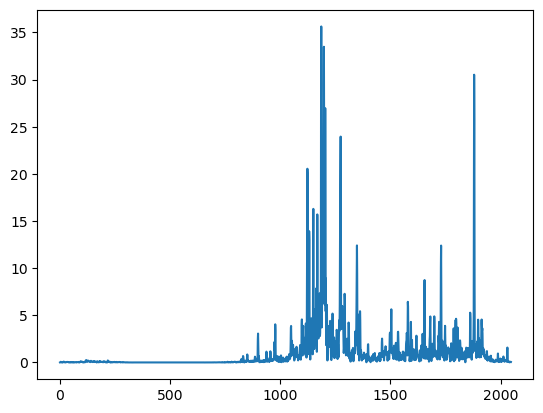

In [28]:
sns.lineplot(X_train_for_model[0][0][15]) 

In [29]:
X_dev = X_dev * wf 

<Axes: >

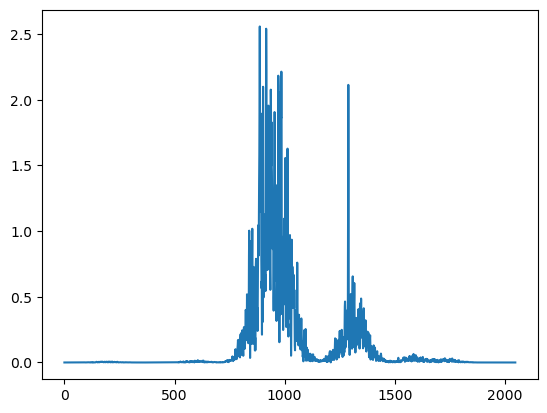

In [30]:
sns.lineplot(X_dev[0][0][2]) 

In [31]:
# X_train.shape, y_train.shape, 
X_train_for_model.shape, y_train_for_model.shape

(torch.Size([5275, 1, 36, 2048]), torch.Size([5275]))

In [32]:
# y_train_model_run = y_train_model_run.reshape(121,12)
# y_train_model_run = torch.tensor([y_train_model_run[i][0].item() for i in range(y_train_model_run.shape[0])])

In [33]:
# y_train = y_train.reshape(60500, 1)
# y_train.shape

In [34]:
# y_train_stacked = y_train_stacked.reshape(121, 12)


In [35]:
# y_train_stacked = torch.tensor([y_train_stacked[i][0].item() for i in range(y_train_stacked.shape[0])])

In [36]:
# y_train_stacked.shape

In [37]:
# X_train_stacked.shape

In [38]:
# y_train_stacked, y_train_stacked.shape

In [39]:
train_dataset_for_model = TensorDataset(X_train_for_model, y_train_for_model)

In [40]:
# train_dataset = TensorDataset(X_train, y_train)

In [41]:
# model_train_dataset = TensorDataset(X_train_model_run, y_train_model_run)

In [42]:
dataloader_for_model = DataLoader(train_dataset_for_model, batch_size = 128 , shuffle=True)

In [43]:
# dataloader = DataLoader(train_dataset, batch_size = 128 , shuffle=True)

In [44]:
# dataloader_model_run = DataLoader(model_train_dataset, shuffle=True)

In [45]:
X_dev= fns.multi_datasets_stacks(X_dev, multi_dim=2, num_groups=12)
y_dev= y_dev.repeat(2)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


In [108]:
X_dev.shape, y_dev.shape

(torch.Size([74, 1, 36, 2048]), torch.Size([74]))

In [47]:
dev_dataset = TensorDataset(X_dev, y_dev)

In [109]:
dataloader_dev = DataLoader(dev_dataset ,shuffle=True)

<span style ='color:red'> ===================================================================================================================================================================</span>

<span style ='color:red'> ===================================================================================================================================================================</span>

<span style ='color:red'> ===================================================================================================================================================================</span>

In [49]:
STOP!!!!!

SyntaxError: invalid syntax (1744448917.py, line 1)

## Model Structure

In [ ]:
sns.lineplot(X_train_for_model[0][0][15])

In [ ]:
model_1= torch.load('stacked_model_v0.0.1.pth')

In [113]:
learning_rate = 0.001
num_epochs = 10

model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=(36,4), stride=(36,4),  padding=0),
    nn.ReLU(),
    
    # nn.Conv2d(16, 32, kernel_size=3, padding=1),
    # nn.ReLU(),
    
    # nn.Conv2d(32, 64, kernel_size=3, padding=1),
    # nn.ReLU(),
    
    nn.Flatten(),
    nn.Linear(512, 256),  # Adjusted input size for Linear layer
    nn.ReLU(),
    nn.Linear(256, 2)  # Final output layer
)

criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## Model Training

In [114]:
from tqdm import tqdm

In [115]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for x_batch, labels in dataloader_dev:
        optimizer.zero_grad()

        # Reshape x_batch to have one input channel
        # x_batch = x_batch.unsqueeze(1)  # Reshape: (batch_size, 1, 5000)
        x_batch = x_batch.view(-1, 36, 2048)
        print(x_batch.shape)
        x_batch = x_batch.to(device)  # Move x_batch to device
        # labels = labels.to(device)  # Move labels to device
        labels = labels.to(device).long()  
        
        outputs = model(x_batch)
        print(outputs.shape, labels.shape)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(dataloader_dev)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

cuda
torch.Size([1, 36, 2048])
torch.Size([16, 1]) torch.Size([1])


ValueError: Expected input batch_size (16) to match target batch_size (1).

## Binary Evaluation

In [70]:
# #For Binary Classification
# model.eval()

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(device)

# model.to(device)

# # Initialize variables to keep track of the loss and predictions
# total_loss = 0.0
# all_labels = []
# all_predictions = []
# correct_cnt = 0
# neg_pred_cnt = 0 

# with torch.no_grad():
#     for x_batch, labels in dataloader_dev:  # Assuming you have a separate validation or test DataLoader
#         # Reshape x_batch to have one input channel
#         # x_batch = x_batch.unsqueeze(1)  # Reshape: (batch_size, 1, 5000)
#         x_batch = x_batch.to(device)  # Move x_batch to device
        
#         # labels = labels.to(device)
#         labels = labels.to(device).long() #DEV로 평가할 경우
#         # print(x_batch.shape)
#         outputs = model(x_batch)  # Forward pass
#         # print(outputs, labels)

#         # loss = criterion(outputs, labels.view(-1,1).float())  # Calculate loss
#         loss = criterion(outputs, labels)
#         total_loss += loss.item()  # Accumulate the loss
        
#         # Get predictions
#         _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
#         # predicted = (outputs >= 0.5).int()
        
#         all_labels.extend(labels.cpu().numpy())  # Store true labels
#         all_predictions.extend(predicted.cpu().numpy())  # Store predicted labels

# # Calculate average loss
# avg_loss = total_loss / len(dataloader_dev)

# # Calculate precision, recall, and F1 score
# precision = precision_score(all_labels, all_predictions, average='weighted')  # Use 'micro' or 'macro' if needed
# recall = recall_score(all_labels, all_predictions, average='weighted')
# f1 = f1_score(all_labels, all_predictions, average='weighted')

# cm = confusion_matrix(all_labels, all_predictions)

# TN = cm[0, 0]  
# FP = cm[0, 1] 
# FN = cm[1, 0]  
# TP = cm[1, 1]  

# FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  
# FNR = FN / (FN + TP) if (FN + TP) > 0 else 0  

# # Print results
# print(f"Evaluation Loss: {avg_loss:.4f}")
# print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
# print(f'Predicted positives out of all negatives: {FPR} = {FP}/{FP + TN}')
# print(f'Predicted negatives out of all positives: {FNR} = {FN}/{FN + TP}')
# print(all_labels)
# print(all_predictions)
# for i in range(len(all_labels)) :
#     if all_labels[i] == 0 and all_predictions[i] == 0:
#         correct_cnt += 1
# for pred in all_predictions:
#     if pred == 0:
#         neg_pred_cnt += 1
# print(f'correct_cnt {correct_cnt}')
# print(f'neg_pred_cnt {neg_pred_cnt}')
# len(all_labels)

## Model Evaluation (CrossEntropy)

In [71]:
# for name, param in model.named_parameters():
#     if param.requires_grad:  # Only print trainable parameters
#         print(f"Layer: {name}, Weights: {param.data}")

In [92]:
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model.to(device)

# Initialize variables to keep track of the loss and predictions
total_loss = 0.0
all_labels = []
all_predictions = []
correct_cnt = 0
neg_pred_cnt = 0 

with torch.no_grad():
    for x_batch, labels in dataloader_dev:  # Assuming you have a separate validation or test DataLoader
        # Reshape x_batch to have one input channel
        # x_batch = x_batch.unsqueeze(1)  # Reshape: (batch_size, 1, 5000)
        x_batch = x_batch.to(device)  # Move x_batch to device
        
        # labels = labels.to(device)
        labels = labels.to(device).long() #DEV로 평가할 경우
        # print(x_batch.shape)
        outputs = model(x_batch)  # Forward pass
        print(outputs, labels)

        loss = criterion(outputs, labels.view(-1,1).float())  # Calculate loss
        
        total_loss += loss.item()  # Accumulate the loss
        
        # Get predictions
        _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
        predicted = (outputs >= 0.5).int()
        
        all_labels.extend(labels.cpu().numpy())  # Store true labels
        all_predictions.extend(predicted[0].cpu().numpy())  # Store predicted labels

# Calculate average loss
avg_loss = total_loss / len(dataloader_dev)

# Calculate precision, recall, and F1 score
precision = precision_score(all_labels, all_predictions, average='weighted')  # Use 'micro' or 'macro' if needed
recall = recall_score(all_labels, all_predictions, average='weighted')
f1 = f1_score(all_labels, all_predictions, average='weighted')

cm = confusion_matrix(all_labels, all_predictions)

TN = cm[0, 0]  
FP = cm[0, 1] 
FN = cm[1, 0]  
TP = cm[1, 1]  

FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  
FNR = FN / (FN + TP) if (FN + TP) > 0 else 0  

# Print results
print(f"Evaluation Loss: {avg_loss:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
print(f'Predicted positives out of all negatives: {FPR} = {FP}/{FP + TN}')
print(f'Predicted negatives out of all positives: {FNR} = {FN}/{FN + TP}')
print(all_labels)
print(all_predictions)
for i in range(len(all_labels)) :
    if all_labels[i] == 0 and all_predictions[i] == 0:
        correct_cnt += 1
for pred in all_predictions:
    if pred == 0:
        neg_pred_cnt += 1
print(f'correct_cnt {correct_cnt}')
print(f'neg_pred_cnt {neg_pred_cnt}')
# len(all_labels)

cuda
tensor([[17.6397]], device='cuda:0') tensor([1], device='cuda:0')
tensor([[13.0824]], device='cuda:0') tensor([1], device='cuda:0')
tensor([[21.2324]], device='cuda:0') tensor([1], device='cuda:0')
tensor([[17.1945]], device='cuda:0') tensor([1], device='cuda:0')
tensor([[10.2518]], device='cuda:0') tensor([0], device='cuda:0')
tensor([[15.8322]], device='cuda:0') tensor([1], device='cuda:0')
tensor([[7.7858]], device='cuda:0') tensor([1], device='cuda:0')
tensor([[13.2558]], device='cuda:0') tensor([1], device='cuda:0')
tensor([[3.6264]], device='cuda:0') tensor([1], device='cuda:0')
tensor([[23.1458]], device='cuda:0') tensor([1], device='cuda:0')
tensor([[8.1951]], device='cuda:0') tensor([1], device='cuda:0')
tensor([[23.7668]], device='cuda:0') tensor([1], device='cuda:0')
tensor([[8.9838]], device='cuda:0') tensor([1], device='cuda:0')
tensor([[17.1945]], device='cuda:0') tensor([1], device='cuda:0')
tensor([[16.8752]], device='cuda:0') tensor([1], device='cuda:0')
tensor([[

C:\Users\user\anaconda3\envs\kdtproj\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [73]:
torch.save(model, 'stacked_model_v0.0.1.pth')

In [74]:
model

Sequential(
  (0): Conv2d(1, 5, kernel_size=(3, 3), stride=(3, 3))
  (1): Dropout(p=0.2, inplace=False)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
  (4): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Conv2d(5, 10, kernel_size=(4, 4), stride=(4, 4))
  (6): Dropout(p=0.2, inplace=False)
  (7): ReLU()
  (8): MaxPool2d(kernel_size=(1, 3), stride=(1, 3), padding=0, dilation=1, ceil_mode=False)
  (9): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Conv2d(10, 5, kernel_size=(1, 4), stride=(1, 2))
  (11): Dropout(p=0.2, inplace=False)
  (12): ReLU()
  (13): MaxPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0, dilation=1, ceil_mode=False)
  (14): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=45, out_features=22, bias=True)
  (17): ReLU()
  (18): Linea